In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
project_path = os.getcwd()
print('Project Path =', project_path)

Project Path = C:\Users\aneek\OneDrive\Desktop\class_5


In [13]:
file_path = project_path + '\\diabetes.csv'
print('File Path =', file_path)

File Path = C:\Users\aneek\OneDrive\Desktop\class_5\diabetes.csv


In [14]:
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully\n")
print(df)

Dataset Loaded Successfully

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50  

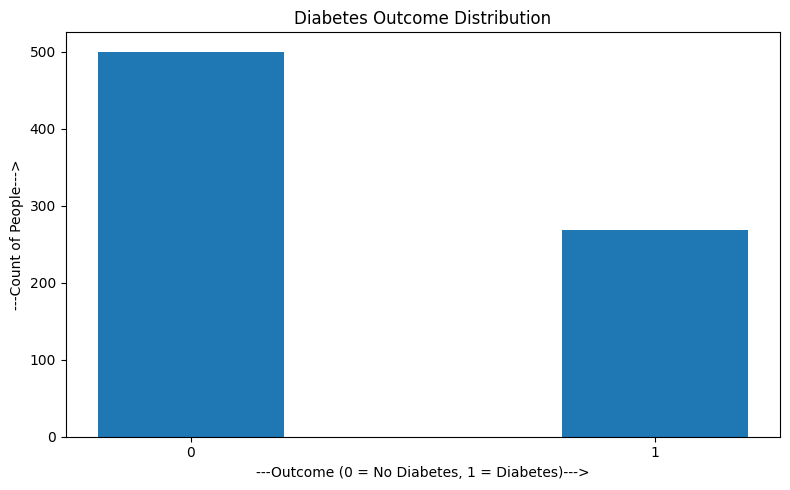

In [15]:
plt.figure(figsize=(8,5))
plt.bar(df['Outcome'].value_counts().index,
        df['Outcome'].value_counts().values,
        width=0.4)

plt.xlabel('---Outcome (0 = No Diabetes, 1 = Diabetes)--->')
plt.ylabel('---Count of People--->')
plt.title('Diabetes Outcome Distribution')
plt.xticks([0,1])
plt.tight_layout()
plt.show()


BMI Values:
 0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


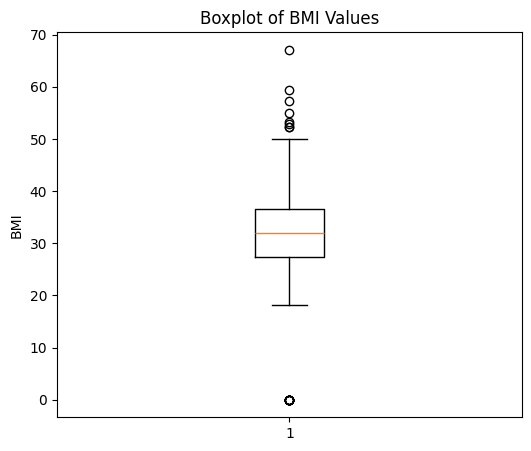

In [16]:
x = df['BMI']
print("\nBMI Values:\n", x)

plt.figure(figsize=(6,5))
plt.boxplot(x)
plt.title("Boxplot of BMI Values")
plt.ylabel("BMI")
plt.show()


Glucose Values:
 0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64


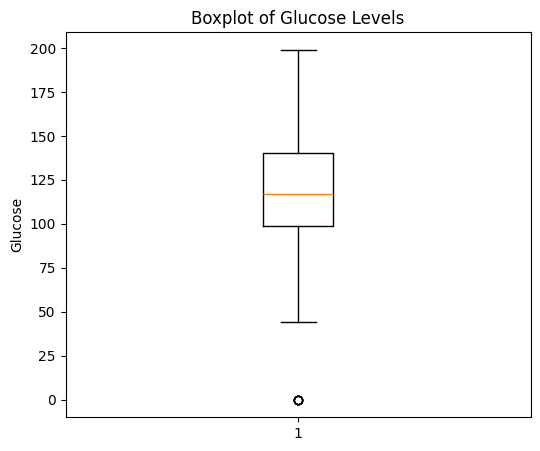

In [17]:
x = df['Glucose']
print("\nGlucose Values:\n", x)

plt.figure(figsize=(6,5))
plt.boxplot(x)
plt.title("Boxplot of Glucose Levels")
plt.ylabel("Glucose")
plt.show()

In [18]:
cols_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_fix:
    df[col] = df[col].replace(0, df[col].median())

In [19]:
X = df.drop("Outcome", axis=1)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [21]:
y_pred = model.predict(X_test)

print("\nModel Accuracy =", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy = 0.7445887445887446

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Text(0, 0.5, 'Actual')

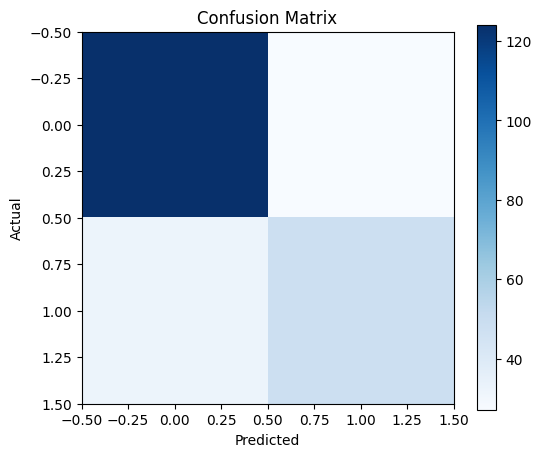

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, cmap='Blues')

plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

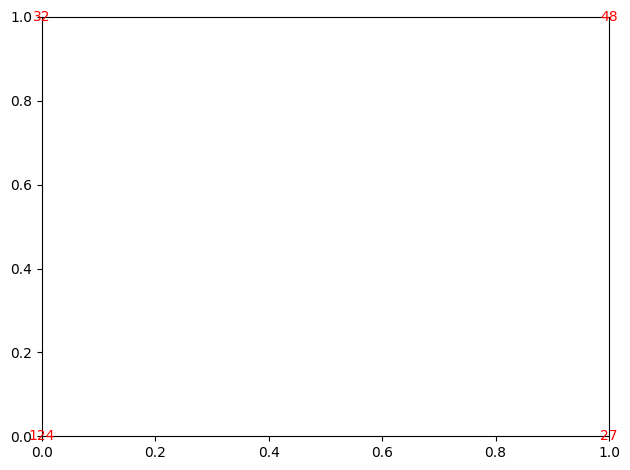

In [23]:
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i][j], ha='center', va='center', color='red')

plt.tight_layout()
plt.show()


In [24]:
sample = {
    "Pregnancies": 2,
    "Glucose": 120,
    "BloodPressure": 70,
    "SkinThickness": 20,
    "Insulin": 80,
    "BMI": 28.5,
    "DiabetesPedigreeFunction": 0.5,
    "Age": 30
}

sample_df = pd.DataFrame([sample])
prediction = model.predict(sample_df)[0]

print("\nPrediction for new person:")

if prediction == 1:
    print("The model predicts: DIABETIC")
else:
    print("The model predicts: NOT DIABETIC")


Prediction for new person:
The model predicts: NOT DIABETIC
